In [2]:
import sys as sus
import matplotlib
import matplotlib.pyplot as plt
import numpy

In [9]:
# Считываем данные
file = open('s1.txt', 'r')
dataX = []
dataY = []
if file != None:
    for line in file:
        x, y = line.strip().split(' ')
        dataX.append(x)
        dataY.append(y)
    
    #print(dataX)
    #print(dataY)

    file.close()


In [ ]:
X = dataX[:50]
Y = dataY[:50]

fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  # Create a figure containing a single axes.
ax.scatter(X, Y, s=50, facecolor='blue');  # Plot some data on the axes.


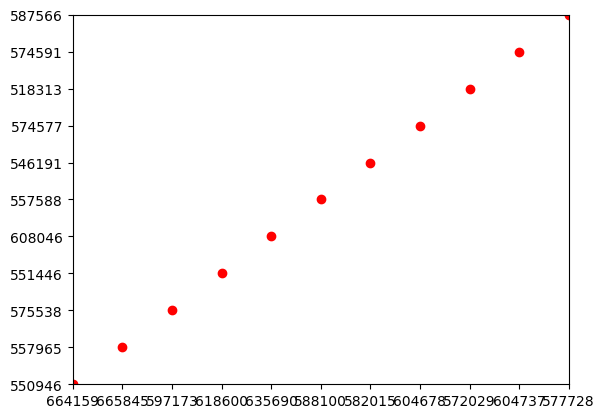

In [10]:
plt.plot(dataX, dataY, 'ro')
plt.axis([0, 10, 0, 10])
plt.show()
